In [1]:
import pandas as pd
import numpy as np
import math as m
from matplotlib import pyplot as plt
iris = pd.read_csv('Train_Iris.csv')

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [119]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [121]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor
99,5.7,2.8,4.1,1.3,versicolor


In [123]:
#ambil dua kelas
data = iris[0:100]

In [125]:
data['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
95    versicolor
96    versicolor
97    versicolor
98    versicolor
99    versicolor
Name: species, Length: 100, dtype: object

In [127]:
data_train1 = iris[:40]
data_train2 = iris[50:90]
data_train = pd.concat([data_train1,data_train2])

data_testing1 = iris[40:50]
data_testing2 = iris[90:100]
data_testing = pd.concat([data_testing1,data_testing2])

In [129]:
data_train.count()

sepal_length    80
sepal_width     80
petal_length    80
petal_width     80
species         80
dtype: int64

In [131]:
data_train

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
85,6.0,3.4,4.5,1.6,versicolor
86,6.7,3.1,4.7,1.5,versicolor
87,6.3,2.3,4.4,1.3,versicolor
88,5.6,3.0,4.1,1.3,versicolor


In [133]:
data_testing.count()

sepal_length    20
sepal_width     20
petal_length    20
petal_width     20
species         20
dtype: int64

In [135]:
data_testing

,sepal_length,sepal_width,petal_length,petal_width,species
40,5.0,3.5,1.3,0.3,setosa
41,4.5,2.3,1.3,0.3,setosa
42,4.4,3.2,1.3,0.2,setosa
43,5.0,3.5,1.6,0.6,setosa
44,5.1,3.8,1.9,0.4,setosa
45,4.8,3.0,1.4,0.3,setosa
46,5.1,3.8,1.6,0.2,setosa
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa


In [137]:
def kodefikasi(spesies):
    if spesies=="setosa":
        x=0
    else: x=1
    return x

In [139]:
def activation(x):
    x=1/(1+((m.exp(-x))))
    return x

def predict(yy):
    yy=1  if yy >= 0.5 else 0
    return yy

def findError(predict,Target):
    error = ((predict - Target) ** 2)
    return error

def dBias(activation,Target):
  dB = 2 *(activation - Target)*(1-activation)*activation
  return dB



In [141]:
data_hitung = data_train.assign(Target=0, W1=0.5, W2 =0.5, W3=0.5, W4=0.5, B=0.5, LR=0.1, result= 0.0, activation = 0.0, predict = 0, error=0, dW1 = 0.0,
         dW2=0.0, dW3=0.0, dW4=0.0, dB=0.0, Accr=0, epoch=1)

In [143]:
data_hitung.reset_index(drop=True, inplace=True)
for i in range(80):
    data_hitung['Target'][i]=kodefikasi(data_hitung['species'][i])

In [145]:
data_evaluasi=data_testing.assign(Target=0, W1=0.5, W2 =0.5, W3=0.5, W4=0.5, B=0.5, result=0.0, activation = 0.0, predict = 0.0, error=0.0)

In [147]:
data_evaluasi.reset_index(drop=True, inplace=True)
for i in range(20):
    data_evaluasi['Target'][i]=kodefikasi(data_evaluasi['species'][i])

In [149]:
import math as m
loss_fc = np.zeros((10))
bias =0.5
learning_rate=0.1
aktivasi = []
epoch=10
data_hitung['W1'][0]=0.5
data_hitung['W2'][0]=0.5
data_hitung['W3'][0]=0.5
data_hitung['W4'][0]=0.5
data_hitung['B'][0]=0.5
accuracies=[]
val_accuracies = []
Accr=[]
errors=[]
val_errors=[]
accuracies1=[]
errors1=[]
for k in range(epoch):

    # shane: Untuk Training
    benar=0
    salah=0
    for i in range(80):
        prediction=data_hitung['activation'][0]
        actual=data_hitung['Target'][0]
        if i==0:
            # shane: data pertama menggunakan weight dan bias data terakhir pada epoch sebelumnya
            data_hitung['W1'][0] = data_hitung['W1'][79] - (learning_rate*data_hitung['dW1'][79])
            data_hitung['W2'][0] = data_hitung['W2'][79] - (learning_rate*data_hitung['dW2'][79])
            data_hitung['W3'][0] = data_hitung['W3'][79] - (learning_rate*data_hitung['dW3'][79])
            data_hitung['W4'][0] = data_hitung['W4'][79] - (learning_rate*data_hitung['dW4'][79])
            data_hitung['B'][0] = data_hitung['B'][79] - (learning_rate*data_hitung['B'][79])
            data_hitung['result'][0]=(data_hitung['W1'][0]*data_hitung['sepal_length'][0]) + (data_hitung['W2'][0]*data_hitung['sepal_width'][0]) + (data_hitung['W3'][0]*data_hitung['petal_length'][0]) + (data_hitung['W4'][0]*data_hitung['petal_width'][0]) + data_hitung['B'][0] # shane: pakai data_hitung['B'][0], bukan variabel bias yang statis
            data_hitung['activation'][0] = activation(data_hitung['result'][0])
            data_hitung['predict'][0] = predict(data_hitung['activation'][0])
            data_hitung['error'][0] = findError(data_hitung['activation'][0],data_hitung['Target'][0])
            data_hitung['dW1'][0] =2*(data_hitung['activation'][0] - data_hitung['Target'][0])* (1- data_hitung['activation'][0])* (data_hitung['activation'][0]*data_hitung['sepal_length'][0])
            data_hitung['dW2'][0] =2*(data_hitung['activation'][0] - data_hitung['Target'][0])* (1- data_hitung['activation'][0])* (data_hitung['activation'][0]*data_hitung['sepal_width'][0])
            data_hitung['dW3'][0] =2*(data_hitung['activation'][0] - data_hitung['Target'][0])* (1- data_hitung['activation'][0])* (data_hitung['activation'][0]*data_hitung['petal_length'][0])
            data_hitung['dW4'][0] =2*(data_hitung['activation'][0] - data_hitung['Target'][0])* (1- data_hitung['activation'][0])* (data_hitung['activation'][0]*data_hitung['petal_width'][0])
            data_hitung['dB'][0] =dBias(data_hitung['activation'][0],data_hitung['Target'][0])

        elif (i > 0):
            data_hitung['W1'][i] = data_hitung['W1'][i-1] - (learning_rate*data_hitung['dW1'][i-1])
            data_hitung['W2'][i] = data_hitung['W2'][i-1] - (learning_rate*data_hitung['dW2'][i-1])
            data_hitung['W3'][i] = data_hitung['W3'][i-1] - (learning_rate*data_hitung['dW3'][i-1])
            data_hitung['W4'][i] = data_hitung['W4'][i-1] - (learning_rate*data_hitung['dW4'][i-1])
            data_hitung['B'][i] = data_hitung['B'][i-1] - (learning_rate*data_hitung['B'][i-1])
            data_hitung['result'][i]=(data_hitung['W1'][i]*data_hitung['sepal_length'][i]) + (data_hitung['W2'][i]*data_hitung['sepal_width'][i]) + (data_hitung['W3'][i]*data_hitung['petal_length'][i]) + (data_hitung['W4'][i]*data_hitung['petal_width'][i]) + (data_hitung['B'][i])
            data_hitung['activation'][i] =activation(data_hitung['result'][i])
            data_hitung['predict'][i] = predict(data_hitung['activation'][i])
            data_hitung['error'][i] = findError(data_hitung['activation'][i],data_hitung['Target'][i])
            data_hitung['dW1'][i] =2*(data_hitung['activation'][i] - data_hitung['Target'][i])* (1- data_hitung['activation'][i])* (data_hitung['activation'][i]*data_hitung['sepal_length'][i])
            data_hitung['dW2'][i] =2*(data_hitung['activation'][i] - data_hitung['Target'][i])* (1- data_hitung['activation'][i])* (data_hitung['activation'][i]*data_hitung['sepal_width'][i])
            data_hitung['dW3'][i] =2*(data_hitung['activation'][i] - data_hitung['Target'][i])* (1- data_hitung['activation'][i])* (data_hitung['activation'][i]*data_hitung['petal_length'][i])
            data_hitung['dW4'][i] =2*(data_hitung['activation'][i] - data_hitung['Target'][i])* (1- data_hitung['activation'][i])* (data_hitung['activation'][i]*data_hitung['petal_width'][i])
            data_hitung['dB'][i] = dBias(data_hitung['activation'][i],data_hitung['Target'][i])

        if(data_hitung['predict'][i]==data_hitung['Target'][i]):
            benar += 1
        else:
            salah += 1
        
    # shane: perhitungan akurasi dan error untuk data training setiap epoch
    akurasi=benar/(benar+salah)
    error=1-akurasi
    accuracies.append(akurasi)
    errors.append(error)

    
    # shane: Untuk Testing/Validation
    benar=0
    salah=0
    for i in range(20):
        # shane: weight dan bias untuk testing diambil dari data terakhir pada epoch yang bersangkutan
        data_evaluasi['result'][i]=(data_hitung['W1'][79]*data_evaluasi['sepal_length'][i]) + (data_hitung['W2'][79]*data_evaluasi['sepal_width'][i]) + (data_hitung['W3'][79]*data_evaluasi['petal_length'][i]) + (data_hitung['W4'][79]*data_evaluasi['petal_width'][i]) + (data_hitung['B'][79])
        data_evaluasi['activation'][i] = activation(data_evaluasi['result'][i])
        data_evaluasi['predict'][i] = predict(data_evaluasi['activation'][i])
        data_evaluasi['error'][i] = findError(data_evaluasi['activation'][i],data_evaluasi['Target'][i])

        if(data_evaluasi['predict'][i]==data_evaluasi['Target'][i]):
            benar += 1
        else:
            salah += 1

    # shane: perhitungan akurasi dan error untuk data testing setiap epoch
    akurasi=benar/(benar+salah)
    error=1-akurasi
    val_accuracies.append(akurasi)
    val_errors.append(error)


WAkhir1=data_hitung['W1'][i]
WAkhir2=data_hitung['W2'][i]
WAkhir3=data_hitung['W3'][i]
WAkhir4=data_hitung['W4'][i]
WBAkhir=data_hitung['B'][i]
print(f"Bobot Akhir 1:{WAkhir1}")
print(f"Bobot Akhir 2: {WAkhir2}")
print(f"Bobot Akhir 3: {WAkhir3}")
print(f"Bobot Akhir 4: {WAkhir4}")
print(WBAkhir)

print(f" Akurasi semua epoch {accuracies}")
print(f" Akurasi Test semua epoch {val_accuracies}")
print(f" Error semua epoch {errors}")
print(f" Error Test semua epoch {val_errors}")


Bobot Akhir 1:-0.47885645868879806
Bobot Akhir 2: -0.7970736576747037
Bobot Akhir 3: 1.4290622442505876
Bobot Akhir 4: 0.9750204246508399
6.893296981215743e-35
 Akurasi semua epoch [0.625, 0.95, 0.975, 0.975, 0.9875, 1.0, 1.0, 1.0, 1.0, 1.0]
 Akurasi Test semua epoch [0.5, 0.5, 0.5, 0.85, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 Error semua epoch [0.375, 0.050000000000000044, 0.025000000000000022, 0.025000000000000022, 0.012499999999999956, 0.0, 0.0, 0.0, 0.0, 0.0]
 Error Test semua epoch [0.5, 0.5, 0.5, 0.15000000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [150]:
data_hitung

,sepal_length,sepal_width,petal_length,petal_width,species,Target,W1,W2,W3,W4,...,activation,predict,error,dW1,dW2,dW3,dW4,dB,Accr,epoch
0,5.1,3.5,1.4,0.2,setosa,0,-0.338596,-0.702698,1.470784,0.981146,...,0.126645,0,0.016039,0.142879,0.098054,0.039222,0.005603,0.028015,0,1
1,4.9,3.0,1.4,0.2,setosa,0,-0.352884,-0.712503,1.466861,0.980586,...,0.165631,0,0.027434,0.224319,0.137338,0.064091,0.009156,0.045779,0,1
2,4.7,3.2,1.3,0.2,setosa,0,-0.375315,-0.726237,1.460452,0.979670,...,0.119896,0,0.014375,0.118924,0.080969,0.032894,0.005061,0.025303,0,1
3,4.6,3.1,1.5,0.2,setosa,0,-0.387208,-0.734334,1.457163,0.979164,...,0.157624,0,0.024845,0.192548,0.129761,0.062787,0.008372,0.041858,0,1
4,5.0,3.6,1.4,0.2,setosa,0,-0.406463,-0.747310,1.450884,0.978327,...,0.076158,0,0.005800,0.053584,0.038580,0.015003,0.002143,0.010717,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,6.0,3.4,4.5,1.6,versicolor,1,-0.364686,-0.755482,1.528294,1.008308,...,0.976657,1,0.000545,-0.006386,-0.003619,-0.004789,-0.001703,-0.001064,0,1
76,6.7,3.1,4.7,1.5,versicolor,1,-0.364048,-0.755120,1.528773,1.008479,...,0.980506,1,0.000380,-0.004993,-0.002310,-0.003503,-0.001118,-0.000745,0,1
77,6.3,2.3,4.4,1.3,versicolor,1,-0.363548,-0.754889,1.529123,1.008590,...,0.982237,1,0.000316,-0.003905,-0.001426,-0.002727,-0.000806,-0.000620,0,1
78,5.6,3.0,4.1,1.3,versicolor,1,-0.363158,-0.754747,1.529396,1.008671,...,0.963871,1,0.001305,-0.014091,-0.007549,-0.010317,-0.003271,-0.002516,0,1


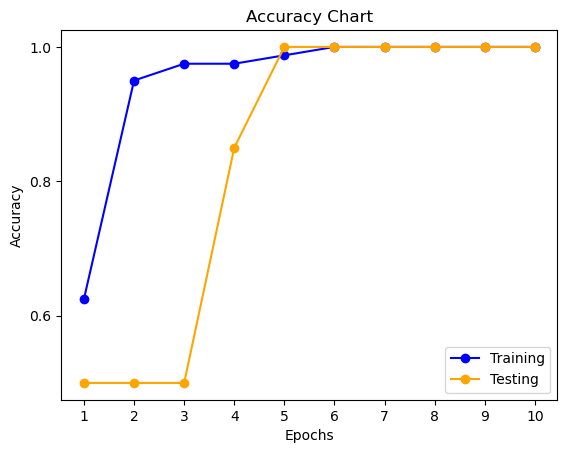

In [153]:
# shane: perbandingan akurasi pada training dan testing
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o',color='blue',label='Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2])
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, marker='o',color='orange',label='Testing')
plt.title('Accuracy Chart')
plt.legend()
plt.show()

In [155]:
data_evaluasi

,sepal_length,sepal_width,petal_length,petal_width,species,Target,W1,W2,W3,W4,B,result,activation,predict,error
0,5.0,3.5,1.3,0.3,setosa,0,0.5,0.5,0.5,0.5,0.5,-2.155459,0.103822,0.0,0.010779
1,4.5,2.3,1.3,0.3,setosa,0,0.5,0.5,0.5,0.5,0.5,-1.069795,0.255442,0.0,0.065251
2,4.4,3.2,1.3,0.2,setosa,0,0.5,0.5,0.5,0.5,0.5,-1.813112,0.140262,0.0,0.019674
3,5.0,3.5,1.6,0.6,setosa,0,0.5,0.5,0.5,0.5,0.5,-1.393632,0.198829,0.0,0.039533
4,5.1,3.8,1.9,0.4,setosa,0,0.5,0.5,0.5,0.5,0.5,-1.398676,0.198026,0.0,0.039214
5,4.8,3.0,1.4,0.3,setosa,0,0.5,0.5,0.5,0.5,0.5,-1.553071,0.174643,0.0,0.030500
6,5.1,3.8,1.6,0.2,setosa,0,0.5,0.5,0.5,0.5,0.5,-2.059603,0.113086,0.0,0.012788
7,4.6,3.2,1.4,0.2,setosa,0,0.5,0.5,0.5,0.5,0.5,-1.732420,0.150278,0.0,0.022584
8,5.3,3.7,1.5,0.2,setosa,0,0.5,0.5,0.5,0.5,0.5,-2.209597,0.098892,0.0,0.009780
9,5.0,3.3,1.4,0.2,setosa,0,0.5,0.5,0.5,0.5,0.5,-1.952518,0.124279,0.0,0.015445


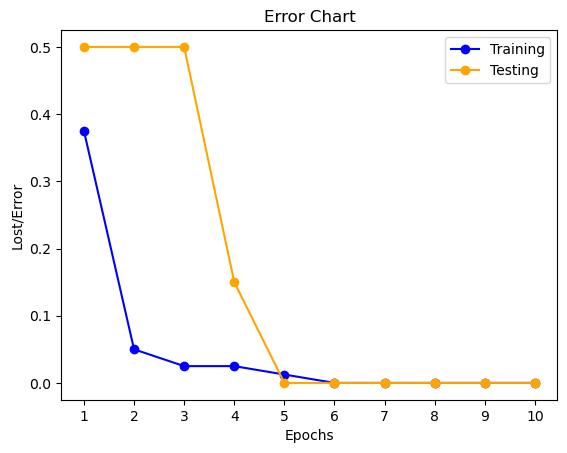

In [157]:
# shane: perbandingan error pada training dan testing
chart = plt.plot(range(1, len(errors) + 1), errors, marker='o',color='blue',label='Training')
plt.xlabel('Epochs')
plt.ylabel('Lost/Error')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
plt.plot(range(1, len(val_errors) + 1), val_errors, marker='o',color='orange',label='Testing')
plt.title('Error Chart')
plt.legend()
plt.show()

In [159]:
data_evaluasi=data_testing.assign(Target=0, W1=WAkhir1, W2=WAkhir2, W3=WAkhir3, W4=WAkhir4, WB=WBAkhir, result=0.0, activation = 0.0, predict = 0.0, error=0.0)